In [2]:
import pickle
import numpy as np
import pandas as pd
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.operators.mutation.pm import PolynomialMutation
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.termination.default import DefaultMultiObjectiveTermination

# Load the dataset
df = pd.read_csv("hardness_composition_data.csv")


In [3]:
df.head()

,Al,Co,Fe,Ni,Si,Mn,Cr,Mo,Ti,Cu,...,V,Nb,Sn,Zn,Ta,Hf,W,MP,HT,HV
0,0.0000,0.3181,0.3551,0.3268,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,125.0
1,0.0963,0.3073,0.3045,0.2919,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,138.0
2,0.1742,0.2749,0.2781,0.2728,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,212.0
3,0.2287,0.2585,0.2613,0.2515,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,385.0
4,0.2842,0.2392,0.2438,0.2328,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,453.0


In [4]:
hardness_model_path = "lgbm.pkl"
# steel_strength_model_path = "steel_strength_model.pkl"

with open(hardness_model_path, 'rb') as f:
    hardness_model = pickle.load(f)

# with open(steel_strength_model_path, 'rb') as f:
#     steel_strength_model = pickle.load(f)

In [5]:
df.head()

,Al,Co,Fe,Ni,Si,Mn,Cr,Mo,Ti,Cu,...,V,Nb,Sn,Zn,Ta,Hf,W,MP,HT,HV
0,0.0000,0.3181,0.3551,0.3268,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,125.0
1,0.0963,0.3073,0.3045,0.2919,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,138.0
2,0.1742,0.2749,0.2781,0.2728,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,212.0
3,0.2287,0.2585,0.2613,0.2515,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,385.0
4,0.2842,0.2392,0.2438,0.2328,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,453.0


In [6]:
X = df.drop(columns = ["HV"])

In [7]:
from pymoo.core.variable import Choice, Real, Integer

In [8]:
mixed_variables = { 'Al'  : Real(bounds=(0, 0.35)),
'Co'  : Real(bounds=(0, 0.35)),
'Fe'  : Real(bounds=(0, 0.35)),
'Ni'  : Real(bounds=(0, 0.35)),
'Si'  : Real(bounds=(0, 0.35)),
'Mn'  : Real(bounds=(0, 0.35)),
'Cr'  : Real(bounds=(0, 0.35)),
'Mo'  : Real(bounds=(0, 0.35)),
'Ti'  : Real(bounds=(0, 0.35)),
'Cu'  : Real(bounds=(0, 0.35)),
'Zr'  : Real(bounds=(0, 0.35)),
'V'  : Real(bounds=(0, 0.35)),
'Nb'  : Real(bounds=(0, 0.35)),
'Sn'  : Real(bounds=(0, 0.35)),
'Zn'  : Real(bounds=(0, 0.35)),
'Ta'  : Real(bounds=(0, 0.35)),
'Hf'  : Real(bounds=(0, 0.35)),
'W'  : Real(bounds=(0, 0.35)),
'MP'  : Integer(bounds=(0, 4)),
'HT' : Real(bounds=(500, 1600))
                    }


In [9]:
mixed_variables

{'Al': <pymoo.core.variable.Real at 0x27210785110>,
 'Co': <pymoo.core.variable.Real at 0x27210785450>,
 'Fe': <pymoo.core.variable.Real at 0x27210785490>,
 'Ni': <pymoo.core.variable.Real at 0x272107854d0>,
 'Si': <pymoo.core.variable.Real at 0x27210785510>,
 'Mn': <pymoo.core.variable.Real at 0x27210785550>,
 'Cr': <pymoo.core.variable.Real at 0x27210785590>,
 'Mo': <pymoo.core.variable.Real at 0x272107855d0>,
 'Ti': <pymoo.core.variable.Real at 0x27210785610>,
 'Cu': <pymoo.core.variable.Real at 0x27210785650>,
 'Zr': <pymoo.core.variable.Real at 0x27210785690>,
 'V': <pymoo.core.variable.Real at 0x272107856d0>,
 'Nb': <pymoo.core.variable.Real at 0x27210785710>,
 'Sn': <pymoo.core.variable.Real at 0x27210785750>,
 'Zn': <pymoo.core.variable.Real at 0x27210785790>,
 'Ta': <pymoo.core.variable.Real at 0x272107857d0>,
 'Hf': <pymoo.core.variable.Real at 0x27210785810>,
 'W': <pymoo.core.variable.Real at 0x27210785890>,
 'MP': <pymoo.core.variable.Integer at 0x27210785910>,
 'HT': <pym

In [10]:
cols = list(X.columns[:-2])

In [11]:
class SteelManufacturing(Problem):

    def __init__(self, **kwargs):
        super().__init__(vars=mixed_variables, n_obj=1, n_ieq_constr=4, **kwargs)  # Updated to 4 constraints

    def _evaluate(self, x, out, *args, **kwargs):
        # Type conversion for Prediction and Constraint
        temp_df = pd.DataFrame(list(x))[cols + ["MP", "HT"]]
        temp_df[cols] = temp_df[cols].map(lambda x: 0 if x < 0.05 else x)  # Elements with less than 5% are set to zero
        
        obj1 = -1 * hardness_model.predict(temp_df)  # Maximize hardness

        # Constraint 1: Sum of element fractions should be between 0.98 and 1.02
        inequality_constraint1 = temp_df[cols].sum(axis=1) - 1.02
        inequality_constraint2 = 0.98 - temp_df[cols].sum(axis=1)

        # Constraint 2: Number of elements used (non-zero elements) should be between 5 and 7
        num_non_zero_elements = (temp_df[cols] > 0).sum(axis=1)
        inequality_constraint3 = num_non_zero_elements - 7  # Ensure <= 7 elements
        inequality_constraint4 = 5 - num_non_zero_elements  # Ensure >= 5 elements

        # Combine constraints
        out["F"] = np.column_stack([obj1])
        out["G"] = np.column_stack([inequality_constraint1, inequality_constraint2, inequality_constraint3, inequality_constraint4])




In [12]:
from pymoo.core.mixed import MixedVariableMating, MixedVariableSampling, MixedVariableDuplicateElimination

problem = SteelManufacturing()

algorithm = NSGA2(pop_size=700,
                  sampling=MixedVariableSampling(),
                  mating=MixedVariableMating(eliminate_duplicates=MixedVariableDuplicateElimination()),
                  eliminate_duplicates=False)

res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False,
               seed=42)

In [13]:
result = pd.DataFrame(list(res.X))[cols+["MP", "HT"]]
result['Hardness'] = -1*res.F

In [14]:
result = result.map(lambda x: 0 if x < 0.05 else x)

In [15]:
result

,Al,Co,Fe,Ni,Si,Mn,Cr,Mo,Ti,Cu,...,V,Nb,Sn,Zn,Ta,Hf,W,MP,HT,Hardness
0,0.172482,0,0.247982,0,0,0,0.219566,0.068464,0.130342,0,...,0,0.078977,0,0,0,0.069029,0,3,562.228519,1605.668927
1,0.170852,0,0.247982,0,0,0,0.220130,0.068807,0.130342,0,...,0,0.078977,0,0,0,0.069029,0,3,567.944136,1605.668927
2,0.172482,0,0.247982,0,0,0,0.222733,0.069675,0.130342,0,...,0,0.085689,0,0,0,0.069029,0,4,576.033627,1605.668927
3,0.170852,0,0.247982,0,0,0,0.220130,0.068807,0.130342,0,...,0,0.078862,0,0,0,0.084116,0,3,567.824722,1605.668927


In [16]:

# Define the callback function
hardness_over_iterations = []

def callback(algorithm):
    # Store the minimum hardness value from the population at each generation
    hardness_over_iterations.append(-np.min(algorithm.pop.get("F")[:, 0]))

# Instantiate the problem
problem = SteelManufacturing()

# Define the algorithm
algorithm = NSGA2(
    pop_size=700,
    sampling=MixedVariableSampling(),
    mating=MixedVariableMating(eliminate_duplicates=MixedVariableDuplicateElimination()),
    eliminate_duplicates=False
)

# Perform the optimization with the callback
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False,
               callback=callback,
               seed=42)

# Plotting
iterations = range(1, len(hardness_over_iterations) + 1)



NameError: name 'plt' is not defined

In [17]:
import matplotlib.pyplot as plt

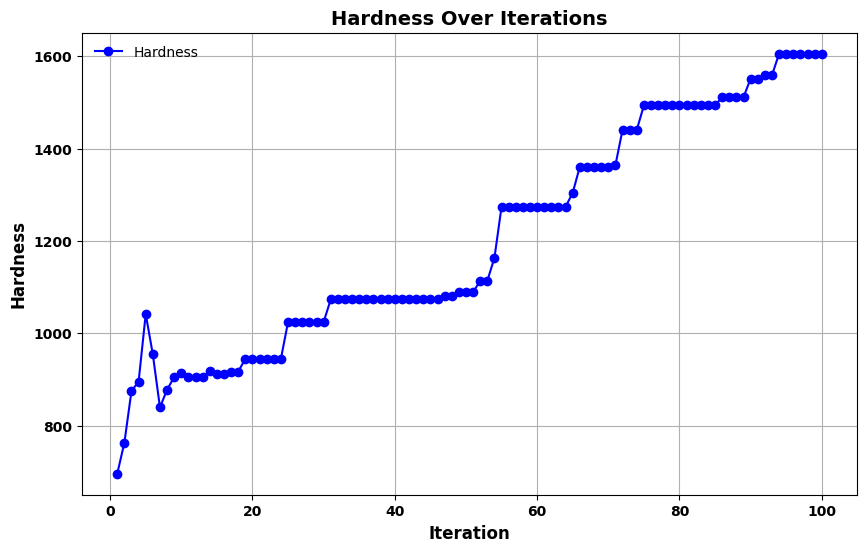

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(iterations, hardness_over_iterations, marker='o', color='blue', label='Hardness')

plt.xlabel("Iteration", fontsize=12, fontweight='bold')
plt.ylabel("Hardness", fontsize=12, fontweight='bold')
plt.title("Hardness Over Iterations", fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='best', frameon=False).set_visible(True)
plt.grid(True)

# Make x-axis and y-axis tick labels bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

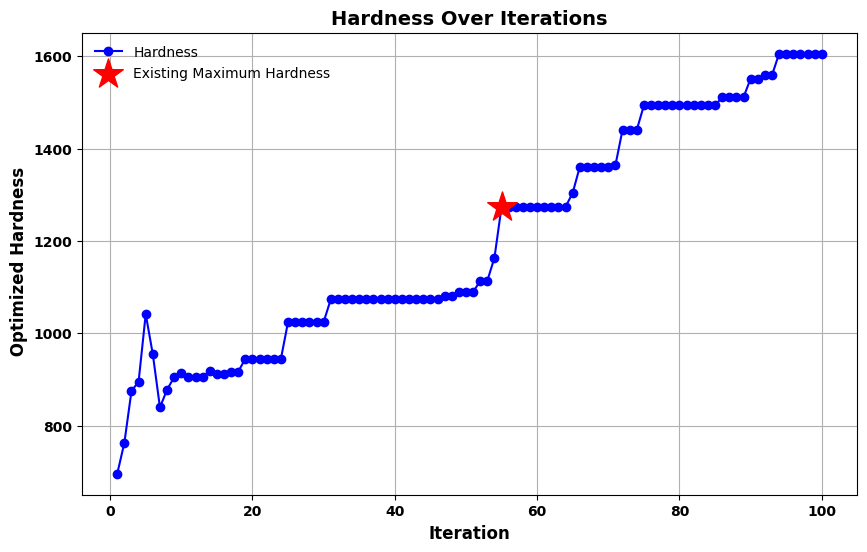

In [26]:
import matplotlib.pyplot as plt

# Define the target hardness value
target_hardness = 1287

# Find the closest hardness value to the target hardness
# Assuming hardness_over_iterations contains the hardness values for each iteration
closest_iteration = np.argmin(np.abs(np.array(hardness_over_iterations) - target_hardness))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(iterations, hardness_over_iterations, marker='o', color='blue', label='Hardness')

# Add a star marker for the target hardness value
# Add a larger star marker for the target hardness value
plt.scatter(iterations[closest_iteration], hardness_over_iterations[closest_iteration],
            color='red', marker='*', s=500, zorder=8, label='Existing Maximum Hardness')  # Increased size with s=200

plt.xlabel("Iteration", fontsize=12, fontweight='bold')
plt.ylabel(" Optimized Hardness", fontsize=12, fontweight='bold')
plt.title("Hardness Over Iterations", fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='best', frameon=False).set_visible(True)
plt.grid(True)

# Make x-axis and y-axis tick labels bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()


In [24]:
# Display the first 15 rows of the DataFrame
print(result.head(15))  # Show the first 15 rows

         Al  Co        Fe  Ni  Si  Mn        Cr        Mo        Ti  Cu  ...  \
0  0.172482   0  0.247982   0   0   0  0.219566  0.068464  0.130342   0  ...   
1  0.170852   0  0.247982   0   0   0  0.220130  0.068807  0.130342   0  ...   
2  0.172482   0  0.247982   0   0   0  0.222733  0.069675  0.130342   0  ...   
3  0.170852   0  0.247982   0   0   0  0.220130  0.068807  0.130342   0  ...   

   V        Nb  Sn  Zn  Ta        Hf  W  MP          HT     Hardness  
0  0  0.078977   0   0   0  0.069029  0   3  562.228519  1605.668927  
1  0  0.078977   0   0   0  0.069029  0   3  567.944136  1605.668927  
2  0  0.085689   0   0   0  0.069029  0   4  576.033627  1605.668927  
3  0  0.078862   0   0   0  0.084116  0   3  567.824722  1605.668927  

[4 rows x 21 columns]


In [25]:
# Display the first 15 rows of the DataFrame with 21 columns
print(result.head(15))  # Show the first 15 rows

         Al  Co        Fe  Ni  Si  Mn        Cr        Mo        Ti  Cu  ...  \
0  0.172482   0  0.247982   0   0   0  0.219566  0.068464  0.130342   0  ...   
1  0.170852   0  0.247982   0   0   0  0.220130  0.068807  0.130342   0  ...   
2  0.172482   0  0.247982   0   0   0  0.222733  0.069675  0.130342   0  ...   
3  0.170852   0  0.247982   0   0   0  0.220130  0.068807  0.130342   0  ...   

   V        Nb  Sn  Zn  Ta        Hf  W  MP          HT     Hardness  
0  0  0.078977   0   0   0  0.069029  0   3  562.228519  1605.668927  
1  0  0.078977   0   0   0  0.069029  0   3  567.944136  1605.668927  
2  0  0.085689   0   0   0  0.069029  0   4  576.033627  1605.668927  
3  0  0.078862   0   0   0  0.084116  0   3  567.824722  1605.668927  

[4 rows x 21 columns]
